In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModel

In [3]:
filename = "lt_1024_data.csv"
df = pd.read_csv(filename)

# Tokenize the data

In [12]:
tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-small")

# count tokens for abstracts and titles
df['abstract_tokens'] = df['abstract'].apply(lambda x: len(tokenizer(x)['input_ids']))
df['title_tokens'] = df['title'].apply(lambda x: len(tokenizer(x)['input_ids']))

Token indices sequence length is longer than the specified maximum sequence length for this model (515 > 512). Running this sequence through the model will result in indexing errors


In [5]:
df['abstract_tokens'].describe()

count    91788.000000
mean       289.518848
std        100.306717
min         16.000000
25%        226.000000
50%        286.000000
75%        349.000000
max       1018.000000
Name: abstract_tokens, dtype: float64

In [6]:
df['title_tokens'].describe()

count    91788.000000
mean        21.869580
std          8.373587
min          4.000000
25%         16.000000
50%         20.000000
75%         26.000000
max        118.000000
Name: title_tokens, dtype: float64

# Token counts for `abstract` and `title`

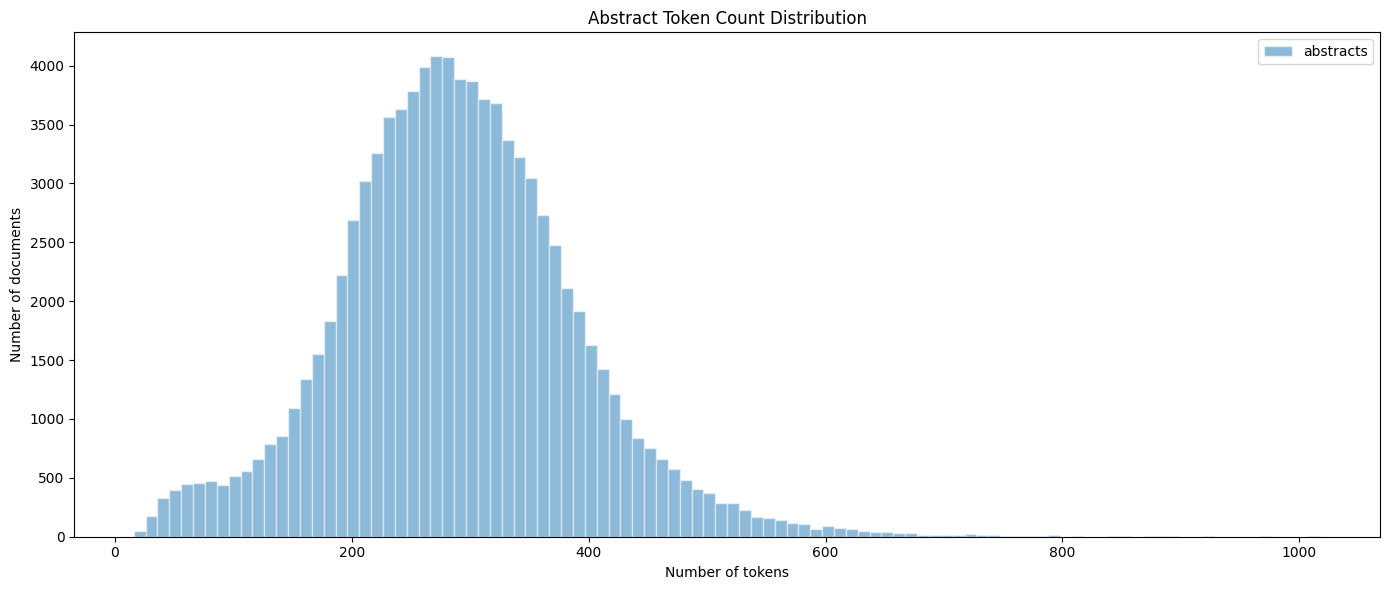

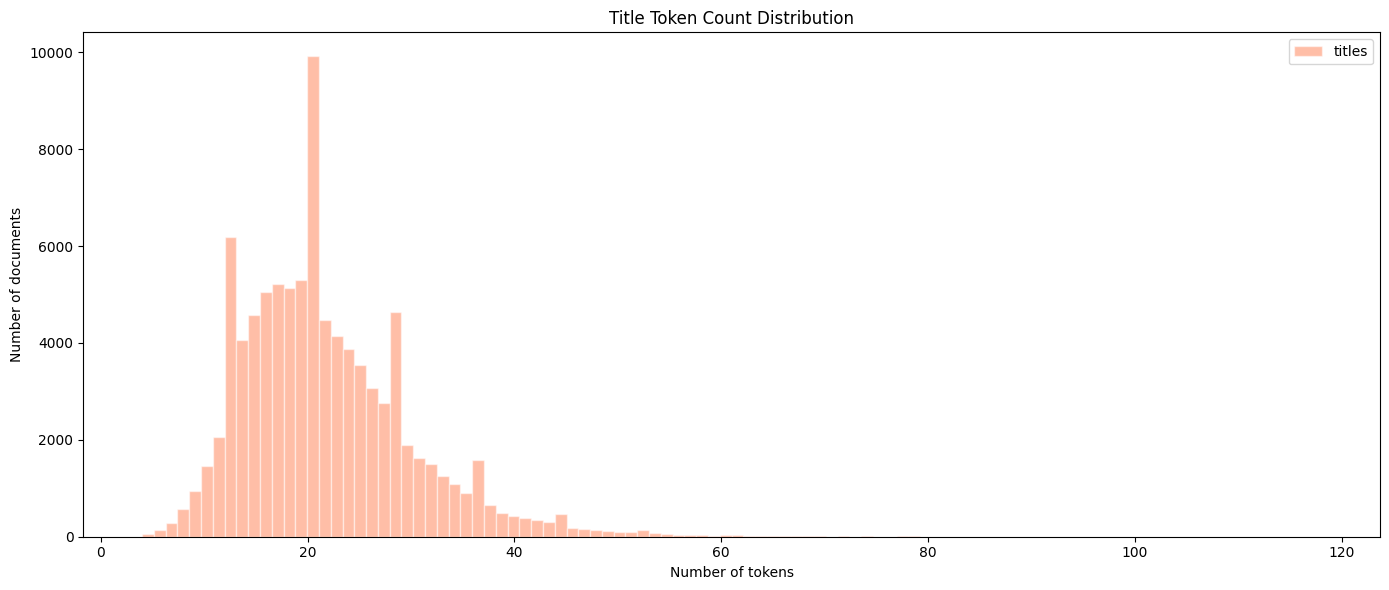

In [17]:
# Plot histogram for abstract tokens
plt.figure(figsize=(14, 6))
plt.hist(df['abstract_tokens'], bins=100, alpha=0.5, label='abstracts', edgecolor='white')
plt.legend()
plt.xlabel('Number of tokens')
plt.ylabel('Number of documents')
plt.title('Abstract Token Count Distribution')
plt.tight_layout()
plt.show()

# Plot histogram for title tokens
plt.figure(figsize=(14, 6))
plt.hist(df['title_tokens'], bins=100, alpha=0.5, label='titles', color='coral', edgecolor='white')
plt.legend()
plt.xlabel('Number of tokens')
plt.ylabel('Number of documents')
plt.title('Title Token Count Distribution')
plt.tight_layout()
plt.show()

# Bigrams and Trigrams

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import seaborn as sns

# Function to get top n-grams
def get_top_ngrams(corpus, n=None, ngram_range=(1, 1)):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

n = 10

# Get top 20 bigrams and trigrams
top_bigrams = get_top_ngrams(df['abstract'], n=n, ngram_range=(2, 2))
top_trigrams = get_top_ngrams(df['abstract'], n=n, ngram_range=(3, 3))

# Convert to DataFrame for visualization
bigrams_df = pd.DataFrame(top_bigrams, columns=['Bigram', 'Frequency'])
trigrams_df = pd.DataFrame(top_trigrams, columns=['Trigram', 'Frequency'])

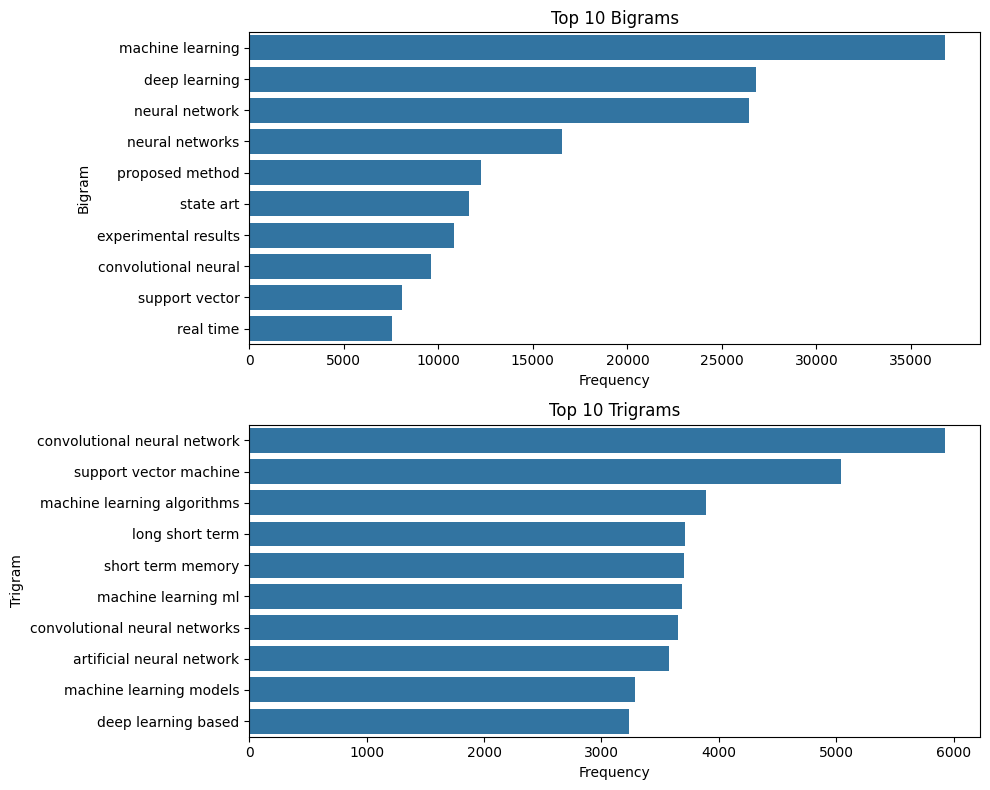

In [9]:
# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot bigrams
sns.barplot(x='Frequency', y='Bigram', data=bigrams_df, ax=axs[0])
axs[0].set_title(f'Top {n} Bigrams')

# Plot trigrams
sns.barplot(x='Frequency', y='Trigram', data=trigrams_df, ax=axs[1])
axs[1].set_title(f'Top {n} Trigrams')

plt.tight_layout()
plt.show()

# Text similarity analysis
## TF-IDF Cosine Similarity

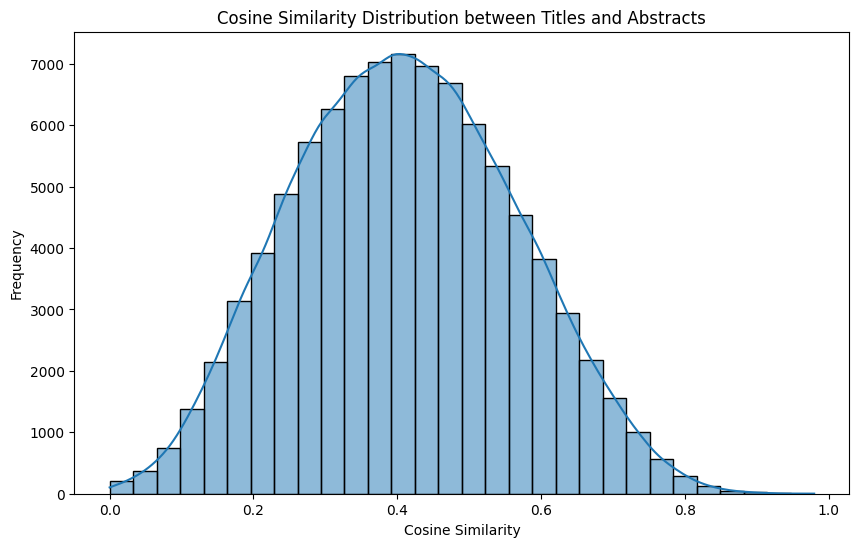

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['abstract'].tolist() + df['title'].tolist())

title_vectors = tfidf_matrix[:len(df)]
abstract_vectors = tfidf_matrix[len(df):]

df["cosine_similarity"] = [
    cosine_similarity(title_vectors[i], abstract_vectors[i])[0][0]
    for i in range(len(df))
]

# Visualize the cosine similarity distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['cosine_similarity'], bins=30, kde=True)
plt.title('Cosine Similarity Distribution between Titles and Abstracts')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.show()

## Readability & Complexity Analysis with Flesch-Kincaid readability score

In [10]:
import textstat
import seaborn as sns
df['title_readability'] = df['title'].apply(textstat.flesch_reading_ease)
df['abstract_readability'] = df['abstract'].apply(textstat.flesch_reading_ease)

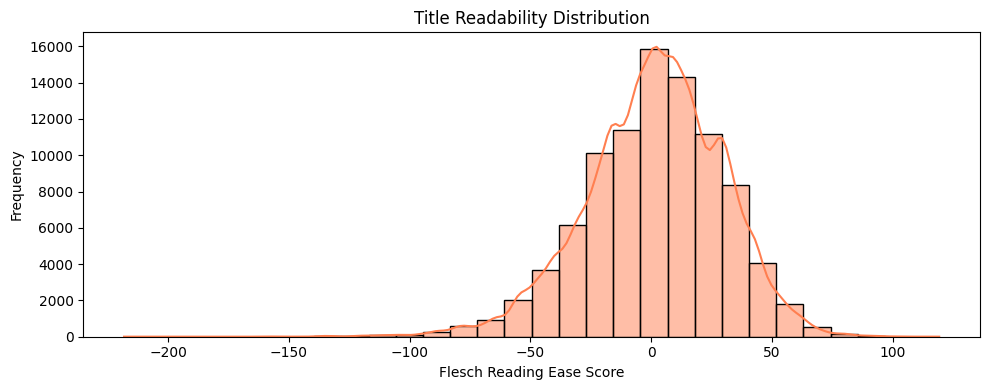

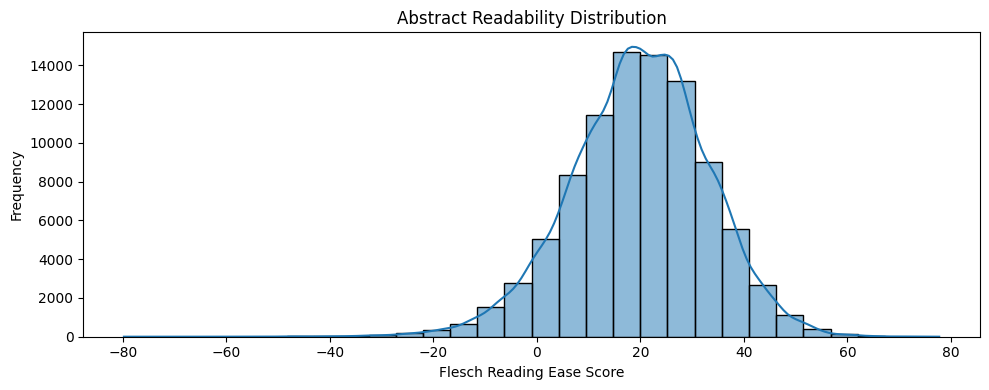

In [11]:
# Plot readability for titles
plt.figure(figsize=(10, 4))
sns.histplot(df['title_readability'], bins=30, kde=True, color='coral')
plt.title('Title Readability Distribution')
plt.xlabel('Flesch Reading Ease Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot readability for abstracts
plt.figure(figsize=(10, 4))
sns.histplot(df['abstract_readability'], bins=30, kde=True)
plt.title('Abstract Readability Distribution')
plt.xlabel('Flesch Reading Ease Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [24]:
from wordcloud import WordCloud

# Generate word cloud for abstracts
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(' '.join(df['abstract']))

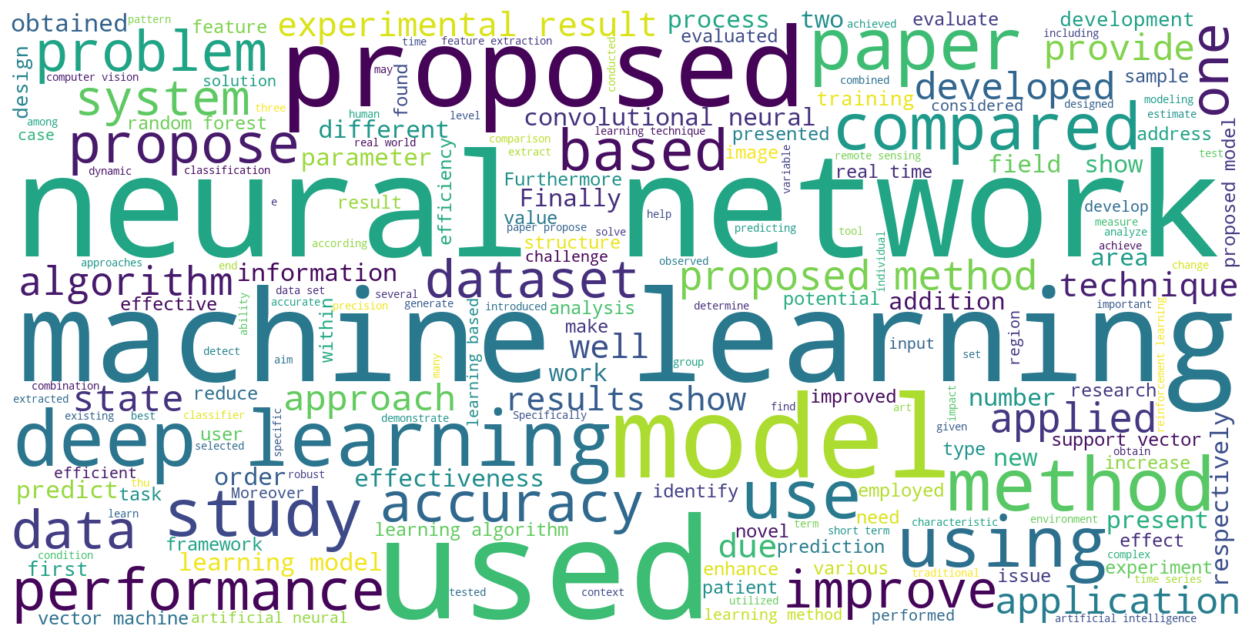

In [28]:
# Plot the word cloud
plt.figure(figsize=(20, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()